<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [1]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import tensorflow as tf
# import tensorflow.keras as keras
keras = tf.keras
import zipfile

**Gebruik een <i>environment variable</i> voor het instellen van het logleven van TensorFlow**

<h2><font color='orange'>Loglevel? Wat en waarom doet onderstaande?</font><h2>

In [2]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

In [3]:
# env_var = os.environ
# print(dict(env_var))

<h2>Data Collection</h2>

<h3>Data downloaden</h3>

In [4]:
dataUrl = requests.get("http://madm.dfki.de/files/sentinel/EuroSAT.zip")
dataFile = zipfile.ZipFile(io.BytesIO(dataUrl.content))

In [5]:
# get file names
txtFiles = list()

for txtFile in dataFile.namelist():
    txtFiles.append(txtFile)
    # print(txtFile)

<h3>Data filteren</h3>

In [6]:
txtFiles = [x for x in txtFiles if ".jpg" in x]

<h3>Data inlezen</h3>

In [7]:
imageObjects = np.zeros([len(txtFiles), 64, 64, 3])

i = 0

for pic in txtFiles:
  imageObjects[i] = np.asarray(Image.open(dataFile.open(pic))).astype('uint8')/255
  i += 1
    
# print(imageObjects[0])    

**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [8]:
imageLabels = np.empty(len(txtFiles), dtype = 'S20')

i = 0

for label in txtFiles:
    txtFiles[i] = label.split('/')[1]
    i += 1
#     print(label) 
   
# print(txtFiles[1])    

In [9]:
# change them to integers in alphabetical order
labelNames, labelNumbers = np.unique(txtFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
# print(labelNames)
# print(labelNumbers)

np.array(np.unique(labelNumbers, return_counts=True)).T

array([[   0, 3000],
       [   1, 3000],
       [   2, 3000],
       [   3, 2500],
       [   4, 2500],
       [   5, 2000],
       [   6, 2500],
       [   7, 3000],
       [   8, 2500],
       [   9, 3000]], dtype=int64)

<h3>Data splitten</h3>

In [10]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.75, random_state=42)
print(trainSet.shape)
nrOfImages = len(trainSet)

(20250, 64, 64, 3)


<h3>Data inspecteren</h3>

In [11]:
def inspectData():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = i
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 
    
    plt.show()

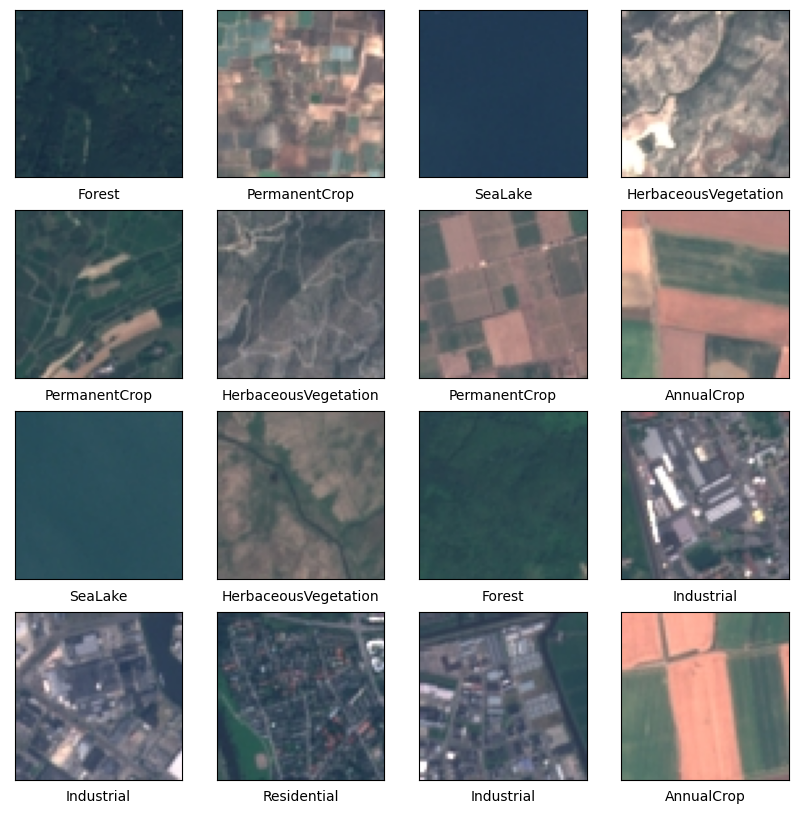

In [12]:
inspectData()    

<h2>Maak een model</h2>

<h3>Definieer de netwerktopologie</h3>

<h3>Exercise 1</h3>
<p>
    Vul de netwerktopologie tot een bruikbaar Neural Netwerk onstaat.
</p>

 <h2><font color='orange'>10 considered classes, images = 64x64 px</font><h2>

In [13]:
# batch_size = 64
img_height = 64
img_width = 64

In [14]:
# normalization_layer = layers.Rescaling(1./255) Boven al gedaan /225

In [15]:
# numberNames = len(labelNames)
# print(numberNames)

In [16]:
model = tf.keras.Sequential([
  keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(64, 64, 3)),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10)
])

# keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

<h3>Definieer de trainparameters</h3>

In [17]:
lossFunction = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = tf.keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 5

<h3>Train het model</h3>

In [18]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
model.fit(trainSet, trainLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)

Epoch 1/5


: 

: 

<h3>Test het model</h3>

<h3>Exercise 2</h3>
<p>
    Test het Neural Netwerk met de testset en laat zien of het in staat is de juiste class te vinden.
</p>

In [ ]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)